# Importanct Code for Signal Processing Basics

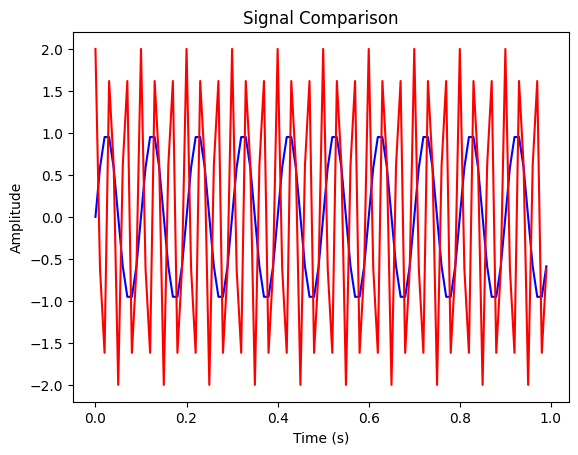

In [2]:
import numpy as np
import matplotlib.pyplot as plt

amplitude = 1.0 # Signal amplitude
frequency = 10.0 # Signal frequency
phase = 0.0 # Signal phase
sampling_rate = 100.0 # Sampling rate
duration = 1.0 # Duration of the signal in seconds
time = np.arange(0, duration, 1.0 / sampling_rate) # Create a time vector

signal_1 = amplitude * np.sin(2 * np.pi * frequency * time + phase)
signal_2 = (amplitude*2) * np.sin(2 * np.pi * (frequency*3) * time + phase+np.pi/2)

#Generate the signal
plt.plot(time, signal_1,'b')
plt.plot(time, signal_2,'r')


# Plot the Signal
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Signal Comparison')
plt.show()


# Discrete Fourier Transform (DFT)

/home/joshua/.local/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/joshua/.local/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


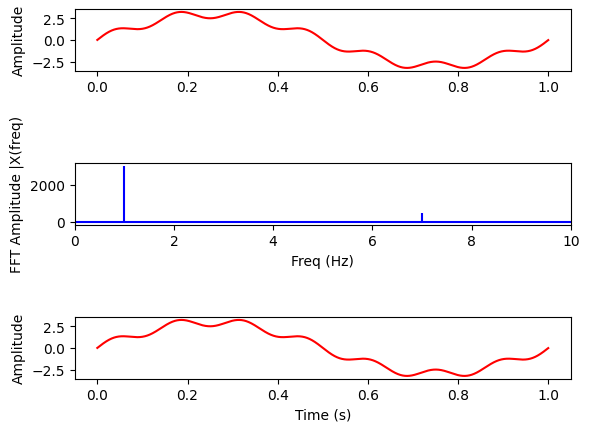

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import fft, ifft, fftfreq

# Generate Test Signals
fs = 2000 # Sampling Rate 1/T
ts = 1.0/fs # Sampling Interval
t = np.arange(0,1,ts)
freq = 1; x = 3*np.sin(2*np.pi*freq*t) #Generate First Signal
freq = 7; x = x + 0.5 * np.sin(2*np.pi*freq*t) # Combine with Second Signal

X = fft(x) # Get the fft Coefficints
N = len(X) # Number of Samples
n = np.arange(N) # Sample Index
T = N/fs # Duration of Signal in Seconds
freq = fftfreq(N,d=ts) # Frequency Index

fig, axes = plt.subplots(3,1)
axes[0].plot(t, x, 'r')
axes[0].set_ylabel('Amplitude')

# Note that the abs(X)=\sqrt(a^2+bj^2)
axes[1].stem(freq, np.abs(X), 'b', markerfmt=" ", basefmt="-b")
axes[1].set_xlabel("Freq (Hz)")
axes[1].set_ylabel('FFT Amplitude |X(freq)')
axes[1].set_xlim(0, 10)

axes[2].plot(t, ifft(X), 'r')
axes[2].set_xlabel('Time (s)')
axes[2].set_ylabel('Amplitude')
plt.subplots_adjust(hspace=1.5)  # Increase this value to add more space
plt.show()

# Another Plot with different units

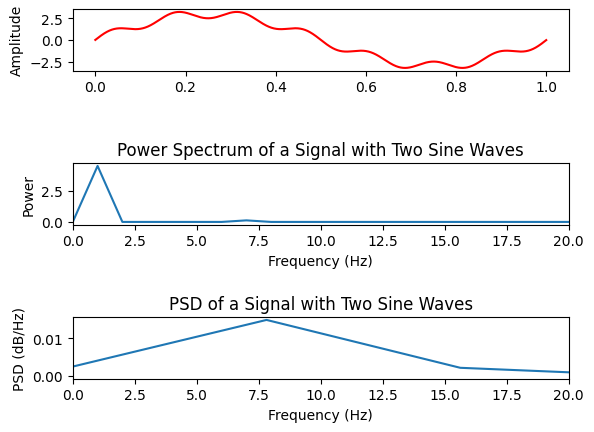

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
fs = 2000 # Sampling Rate 1/T
ts = 1.0/fs # Sampling Interval
t = np.arange(0,1,ts)
freq=1
x = 3*np.sin(2*np.pi*freq*t) # Generate First Signal
freq = 7
x = x+0.5* np.sin(2*np.pi*freq*t) # Combine with Second Signal
N = len(x) # Number of Samples
# Calculate Power Spectrum (spectrum = a^2+b^2 using nonoverlapping window)
f_PS, Pxx_PS = sp.signal.periodogram(x, fs)
# Calculate Power Spectral Density (psd = power_spectrum / T using overlapping window)
f_PSD, Pxx_PSD = sp.signal.welch(x, fs)
# Setup the Plots
fig, axes = plt.subplots(3, 1)
axes[0].plot(t, x, 'r')
axes[0].set_ylabel('Amplitude')
# Plot the power spectrum
axes[1].plot(f_PS, Pxx_PS)
axes[1].set_xlabel('Frequency (Hz)')
axes[1].set_ylabel('Power')
axes[1].set_title('Power Spectrum of a Signal with Two Sine Waves')
axes[1].set_xlim(0, 20)
# Plot the PSD
axes[2].plot(f_PSD, Pxx_PSD)
axes[2].set_xlabel('Frequency (Hz)')
axes[2].set_ylabel('PSD (dB/Hz)')
axes[2].set_title('PSD of a Signal with Two Sine Waves')
axes[2].set_xlim(0, 20)

plt.subplots_adjust(hspace=1.5)  # Increase this value to add more space
plt.show()

# Short Time Fourier Transform

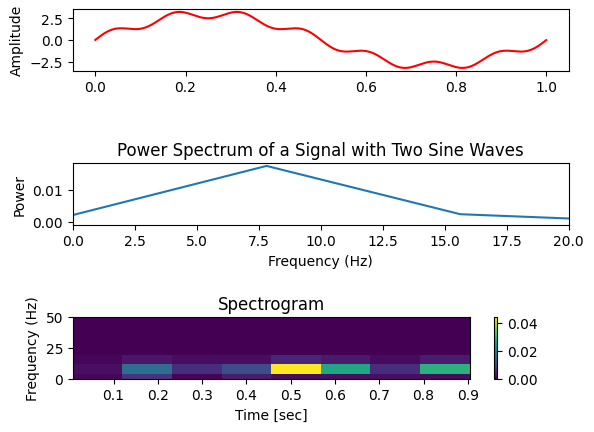

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
fs = 2000 # Sampling Rate 1/T
ts = 1.0/fs # Sampling Interval
t = np.arange(0,1,ts)
freq=1
x = 3*np.sin(2*np.pi*freq*t) # Generate First Signal
freq = 7
x = x+0.5* np.sin(2*np.pi*freq*t) # Combine with Second Signal
N = len(x) # Number of Samples
# The scale of Sxx when we use scaling='density' is V**2/Hz
f, t_id, Sxx = sp.signal.spectrogram(x, fs=fs, window=('hann'), scaling='density', mode='psd')
fig, axes = plt.subplots(3, 1)
axes[0].plot(t, x, 'r')
axes[0].set_ylabel('Amplitude')
# Plot the power spectrum
axes[1].plot(f, np.mean(Sxx ,axis=1))
axes[1].set_xlabel('Frequency (Hz)')
axes[1].set_ylabel('Power')
axes[1].set_title('Power Spectrum of a Signal with Two Sine Waves')
axes[1].set_xlim(0, 20)
# Plot the Spectrogram
c = axes[2].pcolormesh(t_id, f, Sxx, cmap='viridis')
axes[2].set_xlabel('Time [sec]')
axes[2].set_ylabel('Frequency (Hz)')
axes[2].set_title('Spectrogram')

fig.colorbar(c)
axes[2].set_ylim(0,50)
plt.subplots_adjust(hspace=1.5)  # Increase this value to add more space
plt.show()